# 1. Data Analysis of the Influencers:
# 2. Sentiment Analysis of the Influencers: 


In [15]:
# Import the Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [16]:
# Import keys from the config file
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [17]:
# # Twitter API Keys
# consumer_key = 'Your Key'
# consumer_secret = 'Your Key'
# access_token = 'Your Key'
# access_token_secret = 'Your Key'

In [18]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
# API.followers_ids(id/screen_name/user_id)

In [21]:
# Target Search Term of the various Influencers
# Influencers = get the Influencers from the csv / xls file 

Influencers = ('@Oprah','@KimKardashian','@realDonaldTrump','@justinbieber','@KylieJenner')

# Array to hold the sentiments
Tweet_array = []
Sentiment_array = []

In [22]:
# Extract the first 100 tweets of the Influencers
print("-----------Start extraction of the tweets posted by the Influencers!!!-----------")

for user in Influencers:
    # Set the tweet count to 100
    tweet_count = 100
    print("Extracting tweets from %s"%user)
    
    # Extract tweets up to 5 pages
    for x in range(5):
        influencer_tweets = api.user_timeline(user,page = x)
# influencer_tweets        
        
        # For each tweet in a bunch of public tweets
        for tweet in influencer_tweets:
            
            #Calculate the compound, positive, negative and neutral values of each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Save the Tweets in an array as a dictionery item 
            Sentiment_array.append({"Influencers" : user,
                                    "Tweet Text" : tweet["text"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Date" : tweet["created_at"],
                                    "Tweets Ago" : tweet_count
                                   })
            
            #Decrease count of tweet by 1 in the reverse order
            tweet_count -= 1

print("-----------End of Extraction of Tweets !!!-----------")


-----------Start extraction of the tweets posted by the Influencers!!!-----------
Extracting tweets from @Oprah
Extracting tweets from @KimKardashian
Extracting tweets from @realDonaldTrump
Extracting tweets from @justinbieber
Extracting tweets from @KylieJenner
-----------End of Extraction of Tweets !!!-----------


In [23]:
# Create dataframe from the Dictionery item of the Sentiment Array
Sentiment_DF = pd.DataFrame.from_dict(Sentiment_array)

# Remove the '@' from the 'influence' column in the data frame
Sentiment_DF["Influencers"] = Sentiment_DF["Influencers"].map(lambda x: x.lstrip('@'))

# Re_arrang the columns and save into a CSV file
Sentiment_DF = Sentiment_DF[["Influencers", "Date", "Tweet Text"
                             , "Compound", "Positive", "Negative"
                             , "Neutral", "Tweets Ago"
                            ]]

# Store output in a .CSV File
Sentiment_DF.to_csv("influencer_tweets_Analysis.csv")

Sentiment_DF

,Influencers,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,Oprah,Thu Jun 28 22:01:59 +0000 2018,We’re Live on Facebook! Join us now.,0.3595,0.293,0.000,0.707,100
1,Oprah,Thu Jun 28 21:46:29 +0000 2018,See ya from my porch in 15 minutes. LIVE FB #T...,0.0000,0.000,0.000,1.000,99
2,Oprah,Thu Jun 28 20:08:31 +0000 2018,Love this book and the author. Join me FBLive ...,0.7506,0.274,0.000,0.726,98
3,Oprah,Thu Jun 28 03:02:04 +0000 2018,I do so LOVE me some #QueenSugar Thank u for...,0.8283,0.525,0.000,0.475,97
4,Oprah,Thu Jun 28 02:55:43 +0000 2018,After 30 years of being on death row for a cri...,-0.4019,0.162,0.211,0.627,96
5,Oprah,Thu Jun 28 02:53:05 +0000 2018,@MalikThaElite Intentional!,0.0000,0.000,0.000,1.000,95
6,Oprah,Thu Jun 28 02:52:05 +0000 2018,@dawnlyen @shazbennett @thisthatchloe @OWNTV Y...,0.2960,0.216,0.000,0.784,94
7,Oprah,Thu Jun 28 02:50:02 +0000 2018,@AshBenton @OWNTV Pie Empire!!,0.0000,0.000,0.000,1.000,93
8,Oprah,Wed Jun 27 02:48:30 +0000 2018,@AshBenton @OWNTV Nope.. not happening. Days a...,0.0000,0.000,0.000,1.000,92
9,Oprah,Wed Jun 27 02:45:34 +0000 2018,@MawuliChai @chillwillbey @LoveIsOWN @OWNTV So...,0.5009,0.316,0.000,0.684,91


In [24]:
# Create an array of Influencers Houses with the unique function in the data frame
Influencers_array = Sentiment_DF["Influencers"].unique()
Influencers_array

# # #Plotting the graph for each influencer
# for influencer in Influencers_array:
# # Creating a temporary data frame to store for only one influencer at a time
#         Temp_DF = Sentiment_DF[Sentiment_DF["influencer"] == influencer]
        
#         Sentiment_DF['influencer'] = Sentiment_DF['influencer'].map(lambda x: x.lstrip('@'))
# #Temp_DF
    
#         plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"]
#                  , marker = "o", linewidth = 0, alpha = 0.8, label = Influencers
#                  , facecolors = Temp_DF.influencer.map({"@Oprah": "blue"
#                                                    , "@KimKardashian" : "lime"
#                                                    , "@realDonaldTrump": 'indigo'
#                                                    , "@justinbieber":"fuchsia"
#                                                    , "@KylieJenner":"gold"
#                                                   })
#                 )

# # # Set the legend 
# plt.legend(bbox_to_anchor = (1,1), title="The Influencers", loc='best')

# # # Set the labels of x_axis, y_axis & title 
# plt.xlabel("Tweets Ago", fontsize=12)
# plt.ylabel("Tweet Polarity", fontsize=12)
# plt.title("Sentiment Analysis of The Influencers Tweets (%s)" % (time.strftime("%x")), fontsize=16)

# # #Set the limite of  x_axis and y_axis
# plt.xlim(0, 101)
# plt.ylim(-1,1)

# # # Set the grid
# plt.grid(True)

# filePath = 'Images'
# if not path.exists(filePath):
#     makedirs(filePath)

# # Save the result to a .png file
# plt.savefig("Sentiment Analysis of Influencers Tweets.png",bbox_inches='tight')
# # plt.savefig("Sentiment Analysis of The influencer's Tweets.png",bbox_inches='tight')

# plt.show()

array(['Oprah', 'KimKardashian', 'realDonaldTrump', 'justinbieber',
       'KylieJenner'], dtype=object)

In [25]:
# Calculate the mean for each Influencers & store into a dataframe
Influencers_Comp_Mean = Sentiment_DF.groupby("Influencers").mean()["Compound"].to_frame()

#Reset the index 
Influencers_Comp_Mean.reset_index(inplace=True)

Influencers_Comp_Mean

,Influencers,Compound
0,KimKardashian,0.313896
1,KylieJenner,0.395358
2,Oprah,0.308166
3,justinbieber,0.226935
4,realDonaldTrump,0.205660


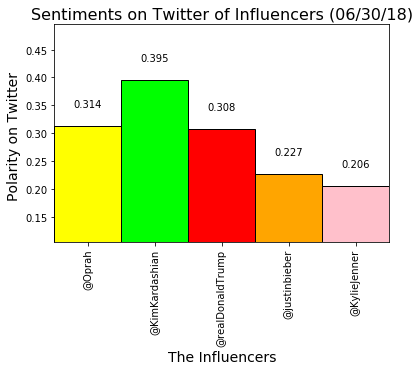

In [26]:
# Set the values for x_axis & y_axis
x_axis = Influencers_Comp_Mean.index.values
y_axis = Influencers_Comp_Mean["Compound"]
X_Label = ["@Oprah","@KimKardashian","@realDonaldTrump","@justinbieber","@KylieJenner"]

# Intialize the plots. 
fig,ax = plt.subplots()#  function that returns a tuple containing a figure and axes object(s)

#Set the plot and assign the values like colors etc
bars = ax.bar(x_axis,y_axis
              , align = "edge"
              , width = 1
              , linewidth = 1
              , edgecolor = 'black'
              , color = ["yellow","lime","red","orange","pink"]
             )

# Set the tick(s) of the bar graph
tick_locations = [value + 0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,X_Label,rotation='vertical')

# If value is positive then put True in the Summary else place False
Influencers_Comp_Mean["Positive"] = Influencers_Comp_Mean["Compound"] > 0

# Assign the height based on positive value after allocating True / false value
height = Influencers_Comp_Mean.Positive.map({True: 0.03 , False: -0.03})

# # Set the value on labels on the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + height[bars.index(bar)]
            , round(Influencers_Comp_Mean["Compound"][bars.index(bar)],3)
            , ha = 'center'
            , va = 'bottom'
            )

# Set the x_axis limits
ax.set_xlim(0, len(x_axis))

# Dynamically set the y_axis limits by finding the max & min value of y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis) + 0.1)

# Set a horizontal line at y = 0
plt.hlines(0,0,len(x_axis))

# Title of the graph
ax.set_title("Sentiments on Twitter of Influencers (%s)" % (time.strftime("%x")), fontsize=16)

# Setting the y_axis label
ax.set_ylabel("Polarity on Twitter ", fontsize=14)

# # Setting the x_axis label
ax.set_xlabel("The Influencers", fontsize=14)
  
# Saving the graph
plt.savefig("The Influencer Twitter Sentiment .png",bbox_inches='tight')
plt.show()

In [ ]:
# API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])
# # Returns tweets that match a specified query.

# # Parameters:	
# # q – the search query string
# # lang – Restricts tweets to the given language, given by an ISO 639-1 code.
# # locale – Specify the language of the query you are sending. This is intended for language-specific clients and the default should work in the majority of cases.
# # rpp – The number of tweets to return per page, up to a max of 100.
# # page – The page number (starting at 1) to return, up to a max of roughly 1500 results (based on rpp * page.
# # since_id – Returns only statuses with an ID greater than (that is, more recent than) the specified ID.
# # geocode – Returns tweets by users located within a given radius of the given latitude/longitude. The location is preferentially taking from the Geotagging API, but will fall back to their Twitter profile. The parameter value is specified by “latitide,longitude,radius”, where radius units must be specified as either “mi” (miles) or “km” (kilometers). Note that you cannot use the near operator via the API to geocode arbitrary locations; however you can use this geocode parameter to search near geocodes directly.
# # show_user – When true, prepends “<user>:” to the beginning of the tweet. This is useful for readers that do not display Atom’s author field. The default is false.
# # Return type:	
# # list of SearchResult objects

In [ ]:
# API.trends_available()
# # Returns the locations that Twitter has trending topic information for. The response is an array of “locations” that encode the location’s WOEID (a Yahoo! Where On Earth ID) and some other human-readable information such as a canonical name and country the location belongs in.
# # Return type:	JSON object

In [ ]:
# API.list_timeline(owner, slug[, since_id][, max_id][, per_page][, page])
# # Show tweet timeline for members of the specified list.
# # Parameters:	
# # owner – the screen name of the owner of the list
# # slug – the slug name or numerical ID of the list
# # since_id – Returns only statuses with an ID greater than (that is, more recent than) the specified ID.
# # max_id – Returns only statuses with an ID less than (that is, older than) or equal to the specified ID.
# # per_page – Number of results per a page
# # page – Specifies the page of results to retrieve. Note: there are pagination limits.
# # Return type:	
# # list of Status objects

In [ ]:
API.trends_place(id[, exclude])
Returns the top 10 trending topics for a specific WOEID, if trending information is available for it.

The response is an array of “trend” objects that encode the name of the trending topic, the query parameter that can be used to search for the topic on Twitter Search, and the Twitter Search URL.

This information is cached for 5 minutes. Requesting more frequently than that will not return any more data, and will count against your rate limit usage.

Parameters:	
id – The Yahoo! Where On Earth ID of the location to return trending information for. Global information is available by using 1 as the WOEID.
exclude – Setting this equal to hashtags will remove all hashtags from the trends list.
Return type:	
JSON object

In [ ]:
API.trends_closest(lat, long)
Returns the locations that Twitter has trending topic information for, closest to a specified location.
The response is an array of “locations” that encode the location’s WOEID and some other human-readable information such as a canonical name and country the location belongs in.
A WOEID is a Yahoo! Where On Earth ID.
Parameters:	
lat – If provided with a long parameter the available trend locations will be sorted by distance, nearest to furthest, to the co-ordinate pair. The valid ranges for longitude is -180.0 to +180.0 (West is negative, East is positive) inclusive.
long – If provided with a lat parameter the available trend locations will be sorted by distance, nearest to furthest, to the co-ordinate pair. The valid ranges for longitude is -180.0 to +180.0 (West is negative, East is positive) inclusive.
Return type:	
JSON object

In [ ]:
API.home_timeline([since_id][, max_id][, count][, page])
# Returns the 20 most recent statuses, including retweets, 
# posted by the authenticating user and that user’s friends. 
#This is the equivalent of /timeline/home on the Web.
API.statuses_lookup(id[, include_entities][, trim_user][, map])
# Returns full Tweet objects for up to 100 tweets per request, specified by the id parameter
API.retweet(id)
# Retweets a tweet. Requires the id of the tweet you are retweeting.
# Parameters:	id – The numerical ID of the status.
# Return type:	Status object
API.retweets(id[, count])
# Returns up to 100 of the first retweets of the given tweet.
# Parameters:	
# id – The numerical ID of the status.
# count – Specifies the number of retweets to retrieve.
# Return type:	
# list of Status objects
API.followers([id/screen_name/user_id][, cursor])
# Returns an user’s followers ordered in which they were added 100 at a time. 
#If no user is specified by id/screen name, it defaults to the authenticated user.
# Parameters:	
# id – Specifies the ID or screen name of the user.
# user_id – Specifies the ID of the user. Helpful for disambiguating when a valid user ID is also a valid screen name.
# screen_name – Specifies the screen name of the user. Helpful for disambiguating when a valid screen name is also a user ID.
# cursor – Breaks the results into pages. Provide a value of -1 to begin paging. Provide values as returned to in the response body’s next_cursor and previous_cursor attributes to page back and forth in the list.
# Return type:	
# list of User objects
API.followers_ids(id/screen_name/user_id)
# Returns an array containing the IDs of users following the specified user.
# Parameters:	
# id – Specifies the ID or screen name of the user.
# screen_name – Specifies the screen name of the user. Helpful for disambiguating when a valid screen name is also a user ID.
# user_id – Specifies the ID of the user. Helpful for disambiguating when a valid user ID is also a valid screen name.
# cursor – Breaks the results into pages. Provide a value of -1 to begin paging. Provide values as returned to in the response body’s next_cursor and previous_cursor attributes to page back and forth in the list.
# Return type:	
# list of Integers
API.rate_limit_status()
# Returns the remaining number of API requests available to the requesting user before 
# the API limit is reached for the current hour. Calls to rate_limit_status do not count 
# against the rate limit. If authentication credentials are provided, the rate limit status 
# for the authenticating user is returned. Otherwise, the rate limit status for the requester’s 
# IP address is returned.
# Return type:	JSON object
API.favorites([id][, page])
# Returns the favorite statuses for the authenticating user or user specified by the ID parameter.
# Parameters:	
# id – The ID or screen name of the user to request favorites
# page – Specifies the page of results to retrieve. Note: there are pagination limits.
# Return type:	
# list of Status objects
API.saved_searches()
# Returns the authenticated user’s saved search queries.
# Return type:	list of SavedSearch objects
API.create_saved_search(query)
# Creates a saved search for the authenticated user.
# Parameters:	query – The query of the search the user would like to save.
# Return type:	SavedSearch object
API.create_list(name[, mode][, description])
# Creates a new list for the authenticated user. Accounts are limited to 20 lists.
# Parameters:	
# name – The name of the new list.
# mode – Whether your list is public or private. Values can be public or private. Lists are public by default if no mode is specified.
# description – The description of the list you are creating.
# Return type:	
# List object
API.update_list(slug[, name][, mode][, description])
# Updates the specified list. Note: this current throws a 500. Twitter is looking into the issue.
# Parameters:	
# slug – the slug name or numerical ID of the list
# name – What you’d like to change the lists name to.
# mode – Whether your list is public or private. Values can be public or private. Lists are public by default if no mode is specified.
# description – What you’d like to change the list description to.
# Return type:	
# List object
API.lists([cursor])
# List the lists of the specified user. Private lists will be included if the authenticated users is the same as the user who’s lists are being returned.
# Parameters:	cursor – Breaks the results into pages. Provide a value of -1 to begin paging. Provide values as returned to in the response body’s next_cursor and previous_cursor attributes to page back and forth in the list.
# Return type:	list of List objects
API.lists_memberships([cursor])
# List the lists the specified user has been added to.
# Parameters:	cursor – Breaks the results into pages. Provide a value of -1 to begin paging. Provide values as returned to in the response body’s next_cursor and previous_cursor attributes to page back and forth in the list.
# Return type:	list of List objects
API.lists_subscriptions([cursor])
# List the lists the specified user follows.
# Parameters:	cursor – Breaks the results into pages. Provide a value of -1 to begin paging. Provide values as returned to in the response body’s next_cursor and previous_cursor attributes to 